# ML Models

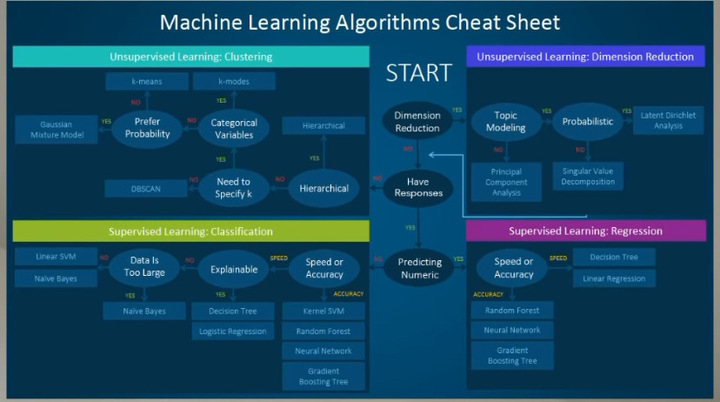

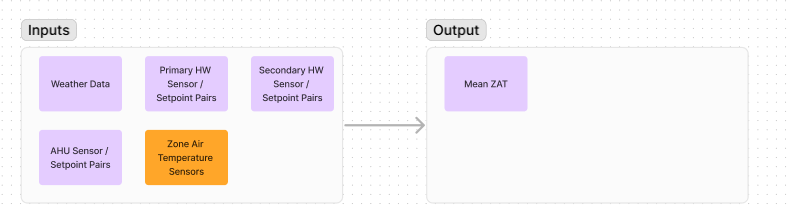

Aim:

Testing ML models to predict the Mean Indoor Temperature

Models to TEST:
- Decision Tree Regressor 
- Random Forest 
- Gradient Boosting Tree


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# add the path to the root folder
path_to_main = "../../"

In [4]:
import sys

sys.path.append(path_to_main)

In [5]:
import pandas as pd
from src.data.load_traning_data import load, combine
import numpy as np
from matplotlib import pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
data = load(path_to_data_folder=path_to_main)
combined_df = combine(data)
combine_X = combined_df.drop("ZAT", axis=1)
Y = combined_df["ZAT"]

In [8]:
combine_X.loc["2024-01-01":]

,AHU 1#setpoint,AHU 1#fan,AHU 1#sensor,Primary HW1#sensor,Primary HW1#setpoint,Secondary HW.Radiators.HeatingCurve#sensor,Secondary HW.Radiators.HeatingCurve#setpoint,DD,FH,temperature,ghi,R,S,U
datetime,,,,,,,,,,,,,,
2024-01-01 00:00:00+00:00,22.000000,1.0,20.038334,24.584999,22.761667,24.584999,22.301666,200,10.0,7.2,0.00000,1.0,0.0,91
2024-01-01 01:00:00+00:00,22.000000,1.0,20.013334,27.340000,26.184999,27.340000,22.343332,210,10.0,7.7,0.00000,1.0,0.0,90
2024-01-01 02:00:00+00:00,21.981667,1.0,19.941668,25.615000,25.040001,25.615000,21.213333,200,10.0,7.3,0.00000,1.0,0.0,93
2024-01-01 03:00:00+00:00,21.938334,1.0,19.973333,24.948334,22.008333,24.948334,21.783333,220,9.0,7.7,0.00000,1.0,0.0,92
2024-01-01 04:00:00+00:00,22.000000,1.0,19.936666,26.551666,26.111668,26.551666,22.270000,230,8.0,8.8,0.00000,1.0,0.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-10 18:00:00+00:00,22.096666,0.0,20.938334,32.848331,20.000000,32.848331,20.000000,310,5.0,10.1,27.77780,1.0,0.0,93
2024-06-10 19:00:00+00:00,22.100000,0.0,20.903334,31.168333,20.000000,31.168333,20.000000,320,5.0,10.3,11.11112,1.0,0.0,88
2024-06-10 20:00:00+00:00,22.100000,0.0,20.881666,29.713333,20.000000,29.713333,20.000000,320,5.0,10.5,0.00000,1.0,0.0,85


In [9]:
X_train = combine_X.loc[:"2023-12-31"]
X_test = combine_X.loc["2024-01-01":]
y_train = Y.loc[:"2023-12-31"]
y_test = Y.loc["2024-01-01":]

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
tree_reg = DecisionTreeRegressor()

In [12]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
pred_y = tree_reg.predict(X_test)

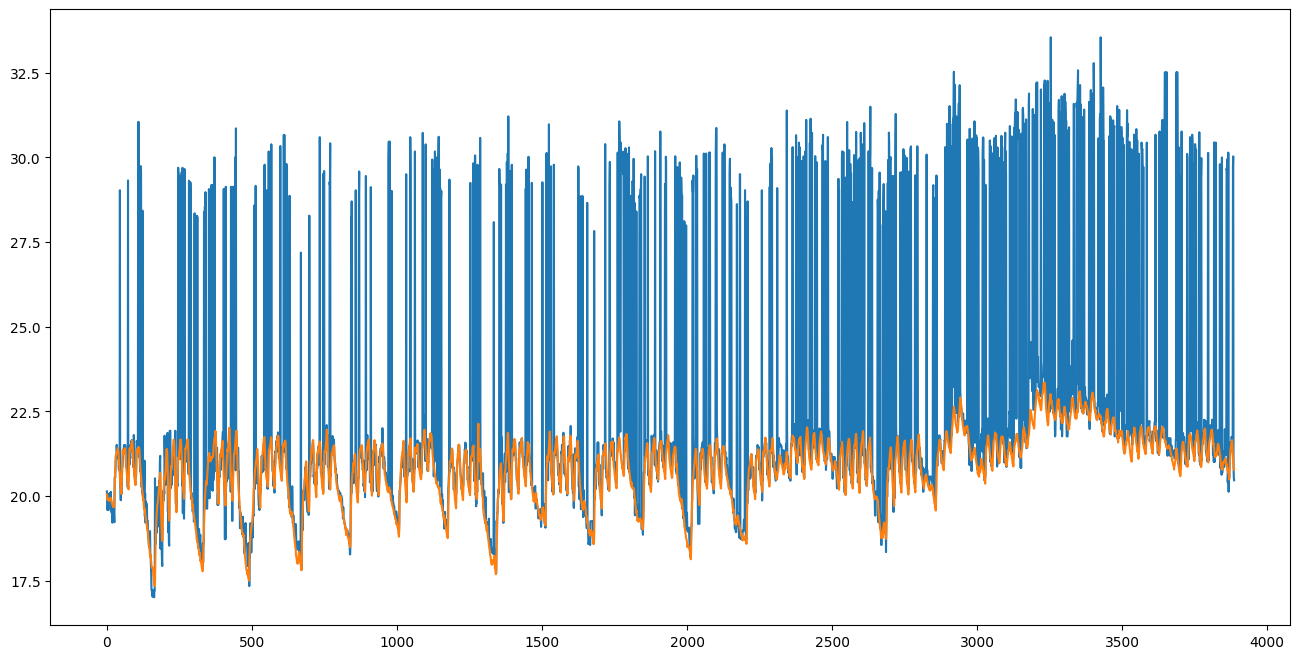

In [14]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.plot(pred_y)
ax.plot(y_test.values)

## Evaluate the model

In [15]:
from sklearn import metrics

print(
    metrics.mean_absolute_error(y_test.values, pred_y),
    np.sqrt(metrics.mean_squared_error(y_test.values, pred_y)),
)

1.7440372650157128 3.740645304433075


## HyperParameter Tuning 

In [16]:
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [17]:
# Create a pipeline with a StandardScaler and a DecisionTreeRegressor
decisiontree_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  ## scalling
        ("regressor", DecisionTreeRegressor()),
    ]
)

# Define the parameter grid to tune
forest_param_grid = {
    "regressor__max_depth": [3, 5, 10, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4],
    "regressor__max_features": ["sqrt", "log2", None],
}

In [18]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=decisiontree_pipeline,
    param_grid=forest_param_grid,
    cv=None,  # 5 fold cross validation
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2,
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END regressor__max_depth=3, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2; total time=   0.2s[CV] END regressor__max_depth=3, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=5; total time=   0.1s[CV] END regressor__max_depth=3, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10; total time=   0.1s[CV] END regressor__max_depth=3, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10; total time=   0.1s



[CV] END regressor__max_depth=3, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10; total time=   0.2s
[CV] END regressor__max_depth=3, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=3, regressor__max_features=sqrt, r

In [19]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 DecisionTreeRegressor(max_depth=3, max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=5))])

In [20]:
# Predict on the test set
from sklearn.metrics import mean_absolute_error


y_pred = best_model.predict(X_test)

# Calculate MSE and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mae, rmse)

1.9364032760316154 2.227256780104642


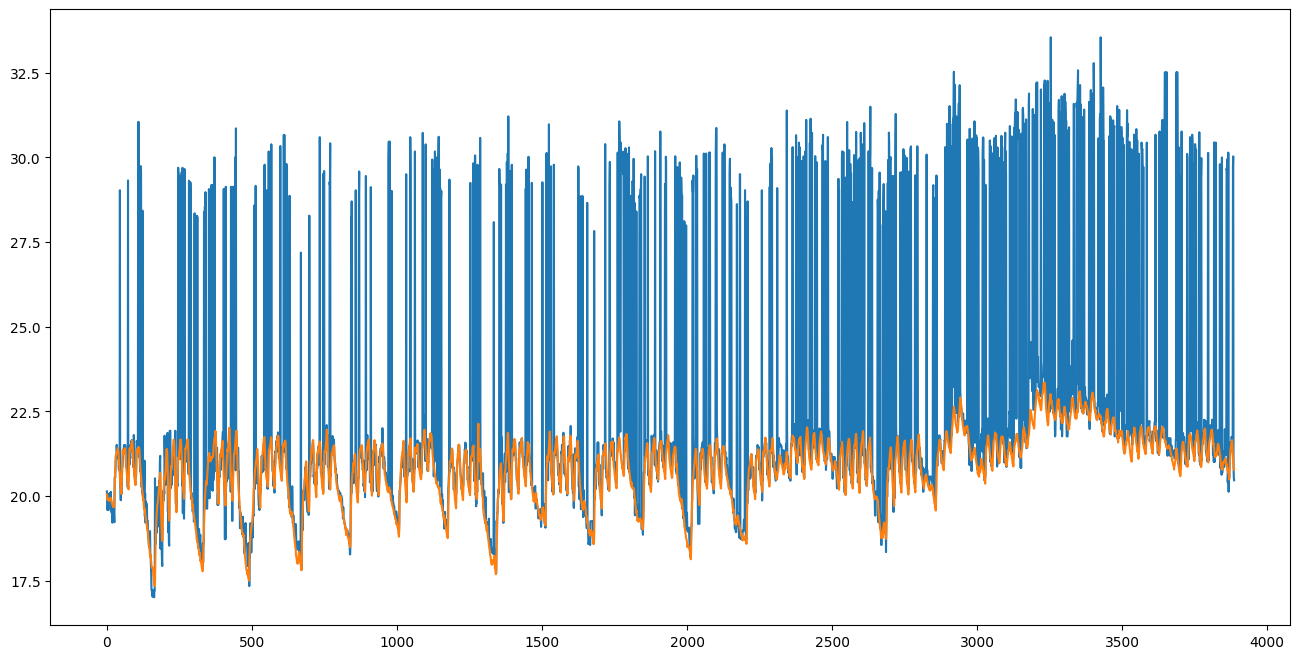

In [21]:
fig, ax = plt.subplots(1, figsize=(16, 8))

ax.plot(pred_y)
ax.plot(y_test.values)

## Summary:
Model still has a lot of random variance at certain point 